In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [63]:
def get_2nd_order_sol(c, y_0, y_d_0, b=0, t_del=0.01):

    time = np.arange(0, 100.1, t_del)
    y = [None] * len(time)
    y[0] = y_0  # math.pi  # (45 * math.pi) / 180
    y_d = [None] * len(time)
    y_d[0] = y_d_0  # 0
    y_dd = [np.nan] * len(time)

    y_dd[0] = -(b * y_d[0]) - (c * y[0])

    df_og = pd.DataFrame({'time': time, 'y': y, 'y_d': y_d, 'y_dd': y_dd})


    def get_y_d(df, index, t_del):
        # t_del = df.loc[index, 'time'] - df.loc[index-1, 'time']
        return df.loc[index-1, 'y_d'] + (t_del * df.loc[index-1, 'y_dd'])

    def get_y(df, index, t_del):
        # t_del = df.loc[index, 'time'] - df.loc[index-1, 'time']
        y_d_mean = (df.loc[index, 'y_d'] + df.loc[index-1, 'y_d']) / 2
        return df.loc[index-1, 'y'] + (t_del * y_d_mean) + (((t_del**2)/2) * df.loc[index-1, 'y_dd'])

    def get_y_dd(df, index):
        return -(b * df.loc[index, 'y_d']) - (c * df.loc[index, 'y'])


    for index, row in df_og.iterrows():
        if index == 0:
            continue
        else:
            df_og.loc[index, 'y_d'] = get_y_d(df=df_og, index=index, t_del=t_del)
            df_og.loc[index, 'y'] = get_y(df=df_og, index=index, t_del=t_del)
            df_og.loc[index, 'y_dd'] = get_y_dd(df=df_og, index=index)

    return df_og

In [64]:
g = 9.8
l = 10
k = g/l
ic_1 = get_2nd_order_sol(c=k,
                         y_0=((15 * math.pi) / 180),
                         y_d_0=0)
ic_2 = get_2nd_order_sol(c=k,
                         y_0=((45 * math.pi) / 180),
                         y_d_0=0)
ic_3 = get_2nd_order_sol(c=k,
                         y_0=math.pi,
                         y_d_0=0)
ic_4 = get_2nd_order_sol(c=k,
                         y_0=((135 * math.pi) / 180),
                         y_d_0=0)


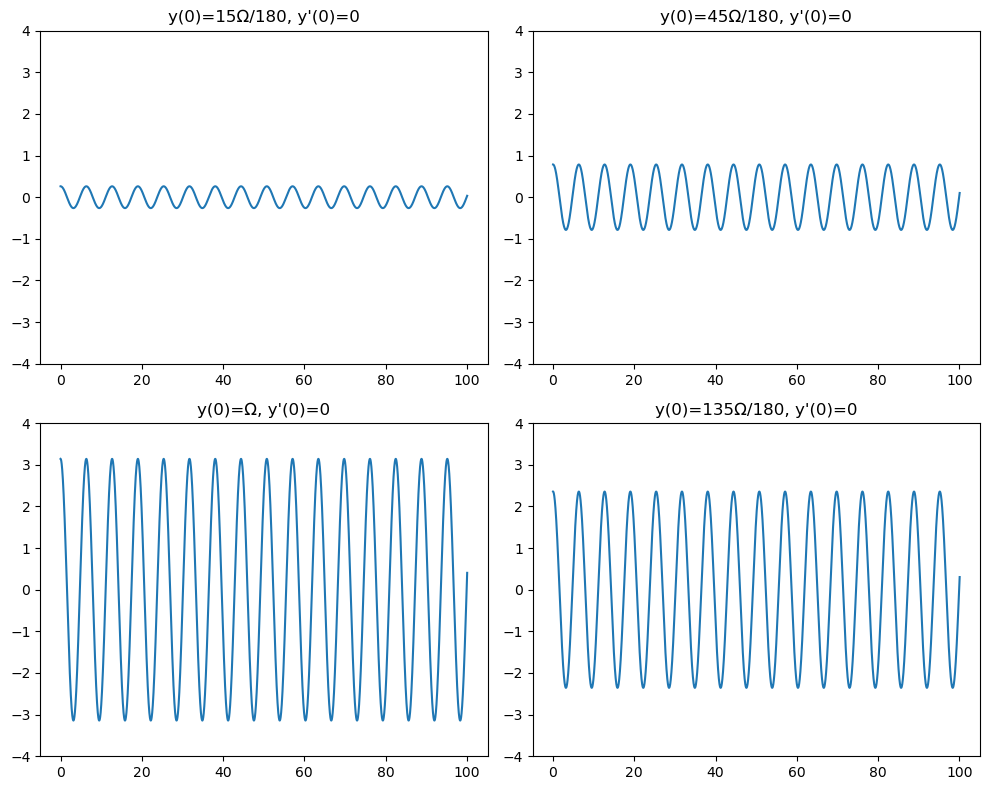

In [65]:
# plt.plot(ic_2['time'], ic_2['y'], label='y')
# # plt.plot(df_og['time'], df_og['y_d'], label='y_d')
# plt.legend()
# plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(ic_1['time'], ic_1['y'])
axes[0, 0].set_title("y(0)=15Ω/180, y'(0)=0")
axes[0, 0].set_ylim([-4, 4])

axes[0, 1].plot(ic_2['time'], ic_2['y'])
axes[0, 1].set_title("y(0)=45Ω/180, y'(0)=0")
axes[0, 1].set_ylim([-4, 4])

axes[1, 0].plot(ic_3['time'], ic_3['y'])
axes[1, 0].set_title("y(0)=Ω, y'(0)=0")
axes[1, 0].set_ylim([-4, 4])

axes[1, 1].plot(ic_4['time'], ic_4['y'])
axes[1, 1].set_title("y(0)=135Ω/180, y'(0)=0")
axes[1, 1].set_ylim([-4, 4])

plt.tight_layout()

plt.show()